In [1]:
from pathlib import Path
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('https://github.com/klieret/simple-science-style/raw/main/stylesheets/sss1.mplstyle')

%matplotlib inline

In [2]:
# Data also available at /scratch/gpfs/IOJALVO/gnn-tracking/object_condensation/measurements
data_dir = Path('/Users/fuchur/Documents/22/git_sync/gnn-tracking-experiments/data/measurements')
assert data_dir.is_dir()

In [3]:
measurements = []
for p in data_dir.iterdir():
    with open(p) as f:
        if not p.suffix == ".json":
            continue
        r = json.load(f)
        for _r in r["results"]:
            _r["name"] = p.stem
        measurements.extend(r["results"])

In [4]:
df = pd.DataFrame.from_records(measurements)
current = df.query("name == 'results-previous'")

In [5]:
current["dR_max"]

89    2.5
Name: dR_max, dtype: float64

In [6]:
print(f"Loaded {len(df)} measurements")

Loaded 515 measurements


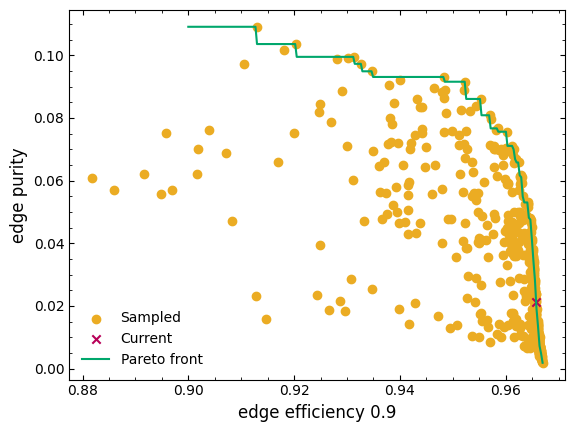

In [7]:
fig, ax = plt.subplots()
ax.scatter("edge_efficiency_0.9", "edge_purity", data=df, label="Sampled")
ax.scatter("edge_efficiency_0.9", "edge_purity", data=current, marker="x", c="C1", label="Current")
ax.set_xlabel("edge efficiency 0.9")
ax.set_ylabel("edge purity")
xs = np.linspace(0.9, 1.02*df["edge_efficiency_0.9"].max(), 300)
ys = [
    df[df["edge_efficiency_0.9"] >= x]["edge_purity"].max() for x in xs
]
ax.plot(xs, ys, c="C3", label="Pareto front")
ax.legend()
#ax.set_xlim(0.95, None)

In [8]:
df.query("`edge_purity` >= 0.05").sort_values("edge_efficiency_0.9", ascending=False)[["z0_max", "phi_slope_max", "dR_max", "edge_efficiency_0.9", "edge_purity"]].head(10)

,z0_max,phi_slope_max,dR_max,edge_efficiency_0.9,edge_purity
338,197.421485,0.001825,1.797170,0.964313,0.051473
277,196.774549,0.001768,1.830858,0.964243,0.052468
191,197.217093,0.001562,5.922786,0.964218,0.052577
255,191.046140,0.001774,1.879552,0.964184,0.053016
252,183.962052,0.001719,6.545329,0.963603,0.052514
201,178.827431,0.001672,2.671778,0.963338,0.054914
261,190.626653,0.001259,4.912078,0.963123,0.061054
195,185.865869,0.001521,1.940860,0.963074,0.059137
189,221.704766,0.001278,1.765008,0.962857,0.059704
197,194.667151,0.001184,5.180619,0.962844,0.061705


In [9]:
df.query("`edge_purity` >= 0.06").sort_values("edge_efficiency_0.9", ascending=False)[["z0_max", "phi_slope_max", "dR_max", "edge_efficiency_0.9", "edge_purity"]].head(10)

,z0_max,phi_slope_max,dR_max,edge_efficiency_0.9,edge_purity
261,190.626653,0.001259,4.912078,0.963123,0.061054
197,194.667151,0.001184,5.180619,0.962844,0.061705
233,208.759742,0.001177,2.108178,0.962783,0.061574
168,187.872302,0.001289,3.670367,0.962720,0.061093
306,198.153424,0.001201,1.772250,0.962509,0.065773
142,204.626708,0.001069,1.872361,0.962002,0.066795
374,203.502005,0.001273,1.455289,0.961842,0.066204
214,189.329064,0.001188,1.577244,0.961588,0.069948
319,199.566312,0.000940,3.258642,0.961496,0.065631
1,184.535968,0.001074,2.013803,0.961400,0.069995


In [10]:
current[['z0_max', 'phi_slope_max', 'dR_max', 'edge_efficiency_0.9', 'edge_purity']]

,z0_max,phi_slope_max,dR_max,edge_efficiency_0.9,edge_purity
89,225.0,0.004,2.5,0.965671,0.02138


Text(0, 0.5, 'phi_slope_max')

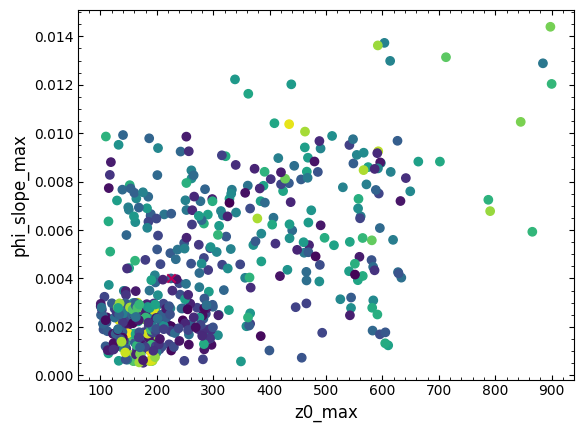

In [11]:
fig, ax = plt.subplots()
ax.scatter("z0_max", "phi_slope_max", c="dR_max", data=df)
ax.scatter("z0_max", "phi_slope_max", marker="x", c="C1", data=current)
ax.set_xlabel("z0_max")
ax.set_ylabel("phi_slope_max")

<Axes: xlabel='z0_max', ylabel='phi_slope_max'>

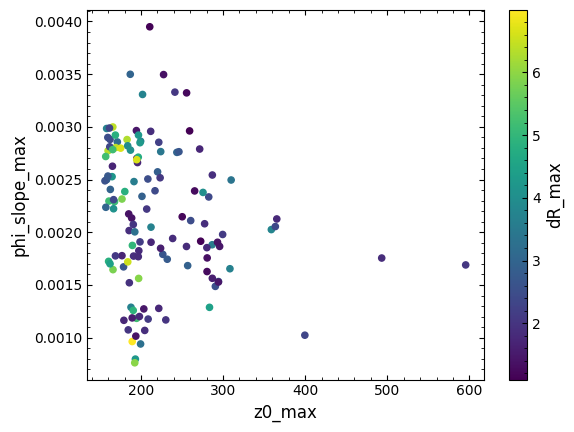

In [12]:
df.query("(`edge_efficiency_0.9` > 0.96) and (edge_purity > 0.025)").plot.scatter("z0_max", "phi_slope_max", c="dR_max")

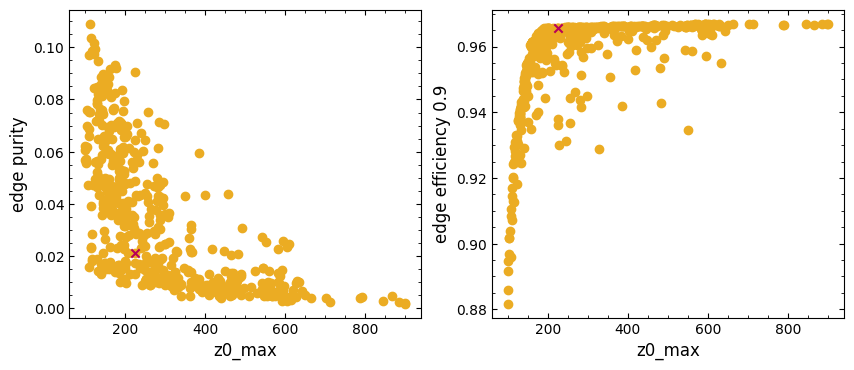

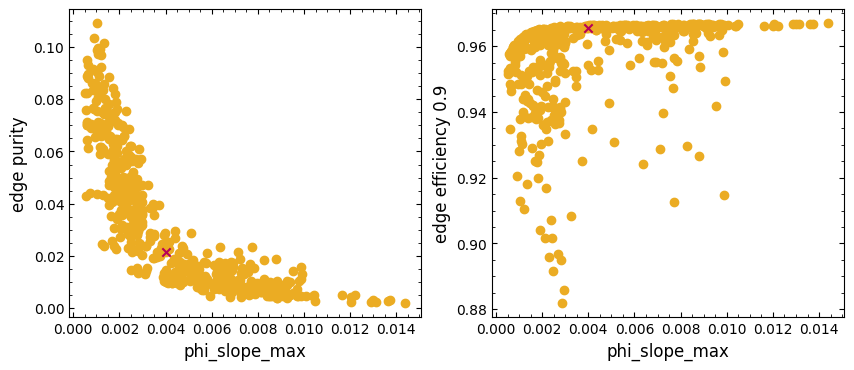

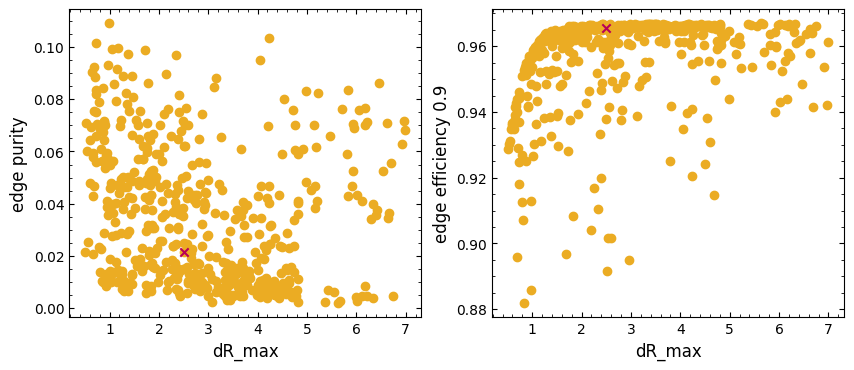

In [13]:
for v in ["z0_max", "phi_slope_max", "dR_max"]:
    fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
    axs[0].scatter(v, "edge_purity", data=df)
    axs[0].scatter(v, "edge_purity", data=current, marker="x", c="C1")
    axs[1].scatter(v, "edge_efficiency_0.9", data=df)
    axs[1].scatter(v, "edge_efficiency_0.9", data=current, marker="x", c="C1")
    for i in range(2):
        axs[i].set_xlabel(v)
    axs[0].set_ylabel("edge purity")
    axs[1].set_ylabel("edge efficiency 0.9")

In [14]:
[c for c in df.columns if "eff" in c]

['edge_efficiency_0',
 'edge_efficiency_0_err',
 'edge_efficiency_0.1',
 'edge_efficiency_0.1_err',
 'edge_efficiency_0.5',
 'edge_efficiency_0.5_err',
 'edge_efficiency_0.9',
 'edge_efficiency_0.9_err',
 'edge_efficiency_1.0',
 'edge_efficiency_1.0_err']

Text(0, 0.5, 'Purity')

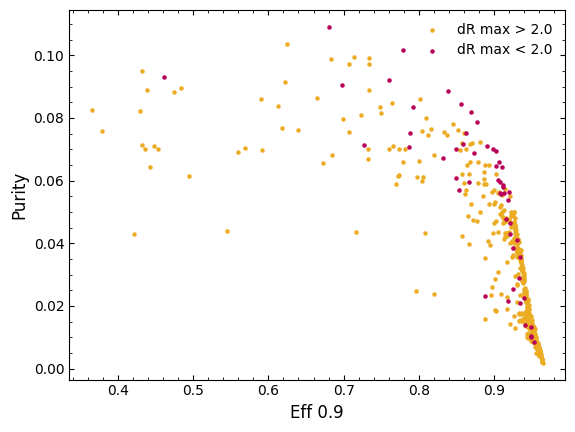

In [15]:
fig, ax = plt.subplots()
ax.scatter("edge_efficiency_0", "edge_purity", data=df.query("dR_max > 1."), s=5, label="dR max > 2.0")
ax.scatter("edge_efficiency_0", "edge_purity", data=df.query("dR_max < 1."), s=5, label="dR max < 2.0")
ax.legend()
ax.set_xlabel("Eff 0.9")
ax.set_ylabel("Purity")

In [16]:
eff, pur = df["edge_efficiency_0.9"], df["edge_purity"]
ep = np.stack((eff, pur))

In [17]:
ep.shape

(2, 515)

In [18]:
pareto_optimal = []
for (e, p) in zip(eff, pur):
    n_opt = (np.array((e, p)).reshape((2, 1)) > ep).sum(axis=0) == 2
    if  n_opt.any():
        pareto_optimal.append(False)
        continue
    pareto_optimal.append(True)

In [19]:
df["pareto_optimal"] = pareto_optimal

(array([9., 2., 0., 3., 2., 4., 3., 1., 2., 2.]),
 array([0.79236013, 1.38795584, 1.98355156, 2.57914727, 3.17474299,
        3.77033871, 4.36593442, 4.96153014, 5.55712585, 6.15272157,
        6.74831729]),
 <BarContainer object of 10 artists>)

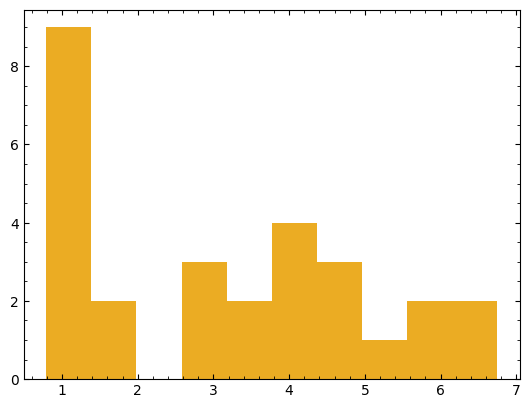

In [20]:
fig, ax = plt.subplots()
ax.hist(df.query("pareto_optimal")["dR_max"])

In [21]:
ax.hist(df["dR_max"])

(array([77., 78., 81., 74., 63., 55., 40., 13., 22., 12.]),
 array([0.50720494, 1.15588644, 1.80456795, 2.45324945, 3.10193095,
        3.75061246, 4.39929396, 5.04797546, 5.69665696, 6.34533847,
        6.99401997]),
 <BarContainer object of 10 artists>)

In [22]:
df.columns

Index(['n_edges', 'n_edges_err', 'n_true_edges', 'n_true_edges_err',
       'n_false_edges', 'n_false_edges_err', 'n_truth_edge_0',
       'n_truth_edge_0_err', 'n_truth_edge_0.1', 'n_truth_edge_0.1_err',
       'n_truth_edge_0.5', 'n_truth_edge_0.5_err', 'n_truth_edge_0.9',
       'n_truth_edge_0.9_err', 'n_truth_edge_1.0', 'n_truth_edge_1.0_err',
       'edge_purity', 'edge_purity_err', 'edge_efficiency_0',
       'edge_efficiency_0_err', 'edge_efficiency_0.1',
       'edge_efficiency_0.1_err', 'edge_efficiency_0.5',
       'edge_efficiency_0.5_err', 'edge_efficiency_0.9',
       'edge_efficiency_0.9_err', 'edge_efficiency_1.0',
       'edge_efficiency_1.0_err', 'phi_slope_max', 'z0_max', 'dR_max', 'name',
       'pareto_optimal'],
      dtype='object')

(0.85, 0.9943383582770522)

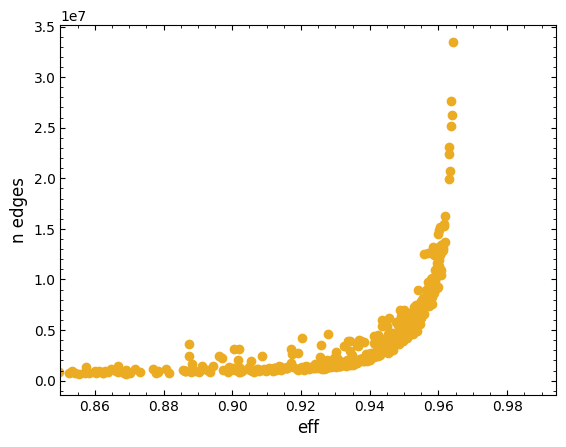

In [23]:
fig, ax = plt.subplots()
ax.scatter( "edge_efficiency_0", "n_edges", data=df)
ax.set_xlabel("eff")
ax.set_ylabel("n edges")
ax.set_xlim(0.85, None)